In [1]:
from gradient_errors import Environment
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd

In [2]:
env = Environment('data_normal.xlsx')

D:\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Sparkline Group extension is not supported and will be removed
  warn(msg)


### Обработка результатов спирт

In [3]:
d_exp =  4 * 0.022 / (env.P_1 * 0.2 * env.g)

In [4]:
env.show(d_exp, name='d_exp')

('8.41', '0.10', -4)

In [5]:
env.show(env.d/1000)

('9.50', '0.10', -4)

In [6]:
d_final = (env.d/1000 + d_exp) / 2

In [7]:
env.show(d_final, name='d_final')

('8.96', '0.07', -4)

### Обработка результатов вода

In [8]:
dp_lin = env.ro * env.g * (env.h_1 - env.h_2) / 100
dp_exp = env.P_1 * 0.2 * env.g

In [9]:
env.show(dp_lin, name='dp_lin')

('1.86', '0.07', 2)

In [10]:
env.show(dp_exp, name='dp_exp')

('1.046', '0.021', 2)

In [11]:
dp_final = (dp_lin + dp_exp) / 2

In [12]:
env.show(dp_final, name='dp_final')

('1.45', '0.04', 2)

In [13]:
env.T1.P - dp_final

tensor([86.5362, 88.5362, 91.8695, 87.8695, 84.5362, 83.5362, 82.8695, 83.2028,
        81.8695], dtype=torch.float64, grad_fn=<SubBackward0>)

### Графики

In [14]:
ro_t = (env.T1.P - dp_final) * 0.2 * env.g * d_final / 2
sT, sro = env.get_err_bars(env.T1.T, ro_t)
a, b = env.chi2(env.T1.T, ro_t, params_name={'a': 'sigma_0', 'b': 'grad_sigma'})

D:\mipt_edu\2sem\labs\2.5.1\process\gradient_errors.py:111: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x).numpy(), torch.tensor(y).numpy()


In [15]:
a_norm, b_norm = env.chi2(env.T1.T[env.T1.T != env.T1.T[2]], ro_t[ro_t != ro_t[2]], params_name={'a': 'sigma_norm', 'b': 'grad_sigma_norm'})

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


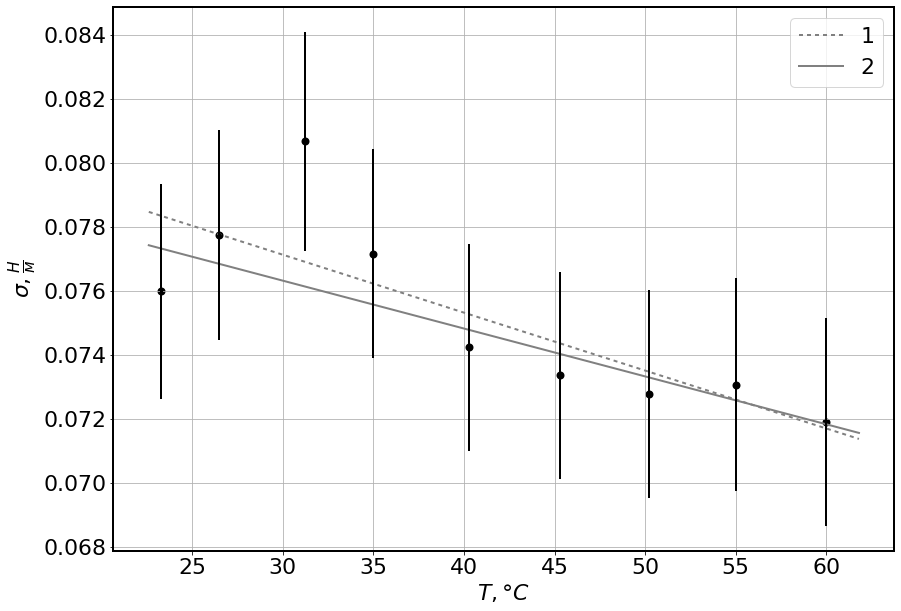

In [16]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

Ro, T = ro_t.detach().numpy(), env.T1.T.detach().numpy()

ax.scatter(T, Ro, linewidth=2, c='black')

X = np.array([min(T)*0.97, max(T)*1.03])

Y = a.item() + b.item()*X
ax.plot(X, Y, linewidth=2, c='gray', dashes=[0, 0, 2], label='1')

Y = a_norm.item() + b_norm.item()*X
ax.plot(X, Y, linewidth=2, c='gray', label='2')

ax.errorbar(T, Ro, xerr = sT, yerr = sro, fmt='none', linewidth=2, c='black')
ax.legend()

ax.set_ylabel(r"$\sigma, \frac{Н}{м}$")
ax.set_xlabel(r"$T, °C$")
fig.savefig(r'../images/sT.eps', format='eps')

In [17]:
df = pd.DataFrame.from_dict({
    r'$T$, \textcelsius': [str(round(_, 1)) for _ in T],
    r'$\sigma$, $\frac{Н}{м}$': [str(round(_, 3)) for _ in Ro],
    r'$\Delta T$, \textcelsius': [str(round(_, 1)) for _ in sT],
    r'$\Delta \sigma$, $\frac{Н}{м}$': [str(round(_, 3)) for _ in sro],
})
print(df.style.to_latex())

\begin{tabular}{lllll}
 & $T$, \textcelsius & $\sigma$, $\frac{Н}{м}$ & $\Delta T$, \textcelsius & $\Delta \sigma$, $\frac{Н}{м}$ \\
0 & 23.3 & 0.076 & 0.1 & 0.003 \\
1 & 26.5 & 0.078 & 0.1 & 0.003 \\
2 & 31.2 & 0.081 & 0.1 & 0.003 \\
3 & 35.0 & 0.077 & 0.1 & 0.003 \\
4 & 40.3 & 0.074 & 0.1 & 0.003 \\
5 & 45.3 & 0.073 & 0.1 & 0.003 \\
6 & 50.2 & 0.073 & 0.1 & 0.003 \\
7 & 55.0 & 0.073 & 0.1 & 0.003 \\
8 & 60.0 & 0.072 & 0.1 & 0.003 \\
\end{tabular}



In [18]:
env.show(b)

('-1.8', '0.5', -4)

In [19]:
env.show(b_norm)

('-1.5', '1.2', -4)

### Другие графики

In [20]:
q_t = -env.T1.T * b_norm
sT, sq = env.get_err_bars(env.T1.T, q_t)
aa, bb = env.chi2(env.T1.T, q_t)

D:\mipt_edu\2sem\labs\2.5.1\process\gradient_errors.py:111: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x).numpy(), torch.tensor(y).numpy()
D:\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


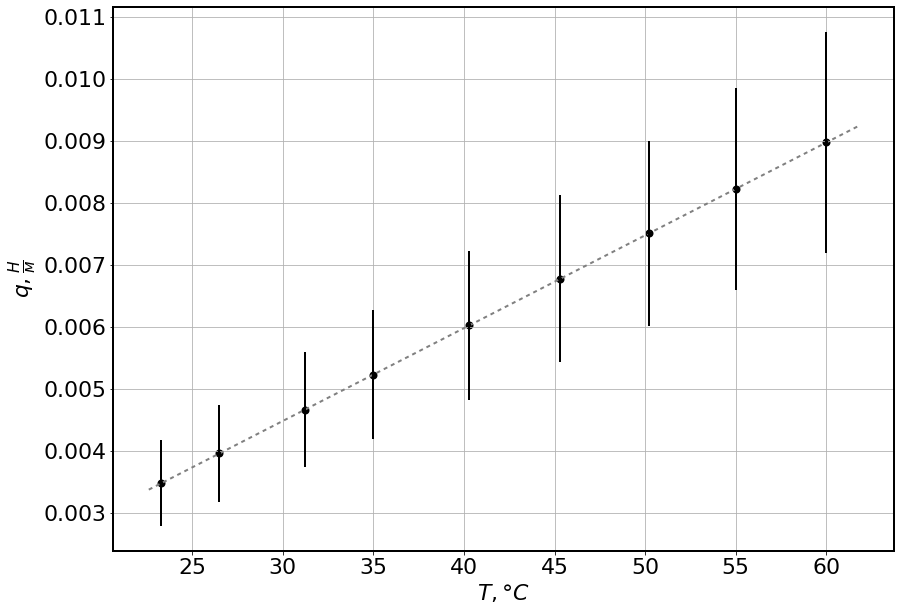

In [21]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

q, T = q_t.detach().numpy(), env.T1.T.detach().numpy()

ax.scatter(T, q, linewidth=2, c='black')

X = np.array([min(T)*0.97, max(T)*1.03])

Y = aa.item() + bb.item()*X
ax.plot(X, Y, linewidth=2, c='gray', dashes=[0, 0, 2])

ax.errorbar(T, q, xerr = sT, yerr = sq, fmt='none', linewidth=2, c='black')

ax.set_ylabel(r"$q, \frac{Н}{м}$")
ax.set_xlabel(r"$T, °C$")
fig.savefig(r'../images/qT.eps', format='eps')

In [22]:
df = pd.DataFrame.from_dict({
    r'$T$, \textcelsius': [str(round(_, 1)) for _ in T],
    r'$q$, $\frac{\text{Н}}{\text{м}}$': [str(round(_, 3)) for _ in q],
    r'$\Delta T$, \textcelsius': [str(round(_, 1)) for _ in sT],
    r'$\Delta q$, $\frac{\text{Н}}{\text{м}}$': [str(round(_, 3)) for _ in sq],
})
print(df.style.to_latex())

\begin{tabular}{lllll}
 & $T$, \textcelsius & $q$, $\frac{\text{Н}}{\text{м}}$ & $\Delta T$, \textcelsius & $\Delta q$, $\frac{\text{Н}}{\text{м}}$ \\
0 & 23.3 & 0.003 & 0.1 & 0.001 \\
1 & 26.5 & 0.004 & 0.1 & 0.001 \\
2 & 31.2 & 0.005 & 0.1 & 0.001 \\
3 & 35.0 & 0.005 & 0.1 & 0.001 \\
4 & 40.3 & 0.006 & 0.1 & 0.001 \\
5 & 45.3 & 0.007 & 0.1 & 0.001 \\
6 & 50.2 & 0.008 & 0.1 & 0.001 \\
7 & 55.0 & 0.008 & 0.1 & 0.002 \\
8 & 60.0 & 0.009 & 0.1 & 0.002 \\
\end{tabular}



In [23]:
Uf = ro_t + q_t
sT, sU = env.get_err_bars(env.T1.T, Uf)
aaa, bbb = env.chi2(env.T1.T, Uf)

D:\mipt_edu\2sem\labs\2.5.1\process\gradient_errors.py:111: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x).numpy(), torch.tensor(y).numpy()


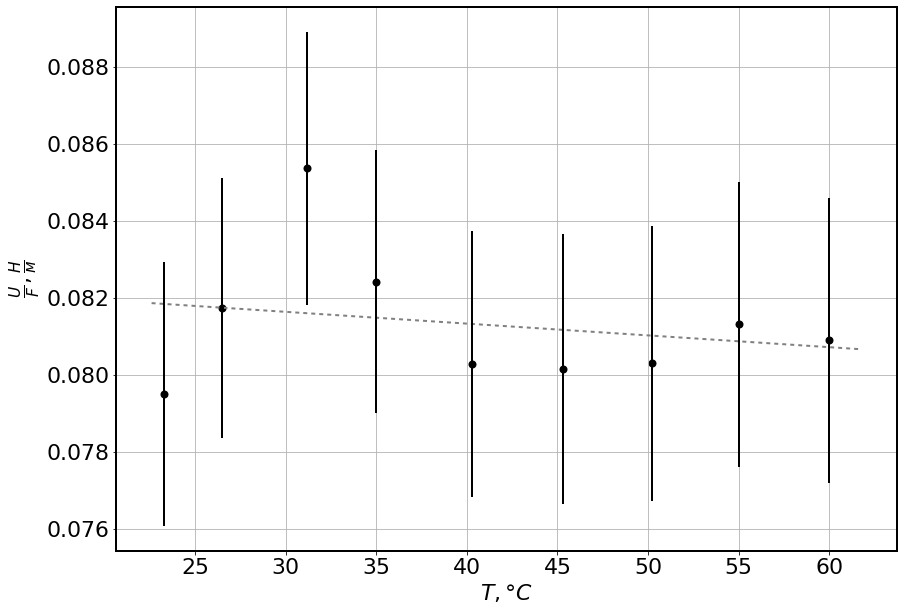

In [24]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

q, T = Uf.detach().numpy(), env.T1.T.detach().numpy()

ax.scatter(T, q, linewidth=2, c='black')

X = np.array([min(T)*0.97, max(T)*1.03])

Y = aaa.item() + bbb.item()*X
ax.plot(X, Y, linewidth=2, c='gray', dashes=[0, 0, 2])

ax.errorbar(T, q, xerr = sT, yerr = sU, fmt='none', linewidth=2, c='black')

ax.set_ylabel(r"$\frac{U}{F}, \frac{Н}{м}$")
ax.set_xlabel(r"$T, °C$")
fig.savefig(r'../images/qUF.eps', format='eps')

In [25]:
df = pd.DataFrame.from_dict({
    r'$T$, \textcelsius': [str(round(_, 1)) for _ in T],
    r'$\frac{U}{F}$, $\frac{\text{Н}}{\text{м}}$': [str(round(_, 3)) for _ in q],
    r'$\Delta T$, \textcelsius': [str(round(_, 1)) for _ in sT],
    r'$\Delta \frac{U}{F}$, $\frac{\text{Н}}{\text{м}}$': [str(round(_, 3)) for _ in sq],
})
print(df.style.to_latex())

\begin{tabular}{lllll}
 & $T$, \textcelsius & $\frac{U}{F}$, $\frac{\text{Н}}{\text{м}}$ & $\Delta T$, \textcelsius & $\Delta \frac{U}{F}$, $\frac{\text{Н}}{\text{м}}$ \\
0 & 23.3 & 0.079 & 0.1 & 0.001 \\
1 & 26.5 & 0.082 & 0.1 & 0.001 \\
2 & 31.2 & 0.085 & 0.1 & 0.001 \\
3 & 35.0 & 0.082 & 0.1 & 0.001 \\
4 & 40.3 & 0.08 & 0.1 & 0.001 \\
5 & 45.3 & 0.08 & 0.1 & 0.001 \\
6 & 50.2 & 0.08 & 0.1 & 0.001 \\
7 & 55.0 & 0.081 & 0.1 & 0.002 \\
8 & 60.0 & 0.081 & 0.1 & 0.002 \\
\end{tabular}



In [26]:
env.show(dp_final, name='dp_final')

('1.45', '0.04', 2)